# Hands-On Tutorial 2: Linear Models
Today we will learn how to implement Logistic and Linear Regression.

# 1. Linear Regression

In this part, we introduce how we can run linear regression on synthetic data, review concepts such as overfitting and underfitting, regularization, and some simple feature engineering.

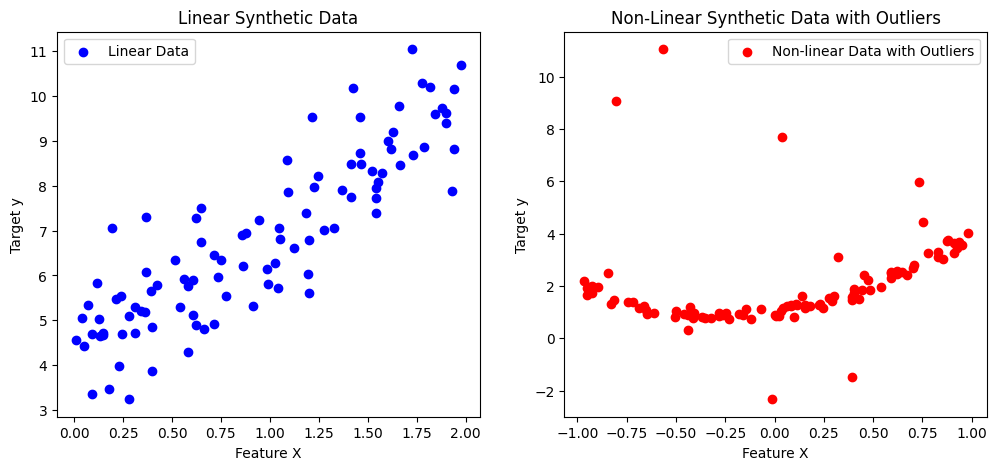

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate linear synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True linear relationship with noise

# Introduce non-linearity and outliers for later experiments
X_nl = 2 * np.random.rand(100, 1) - 1  # Shift range to [-1, 1]
y_nl = 2 * X_nl**2 + X_nl + 1 + np.random.randn(100, 1) * 0.2  # Quadratic with noise
outlier_indices = np.random.choice(100, 10, replace=False)
y_nl[outlier_indices] += np.random.randn(10, 1) * 5  # Adding outliers

# Visualize linear data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label="Linear Data")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Synthetic Data")
plt.legend()

# Visualize non-linear data with outliers
plt.subplot(1, 2, 2)
plt.scatter(X_nl, y_nl, color='red', label="Non-linear Data with Outliers")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Non-Linear Synthetic Data with Outliers")
plt.legend()

plt.show()


Demonstration of a simple linear function on linear data:

Model Coefficient (Slope): 2.7993236574802762
Model Intercept (Bias): 4.142913319458566
Mean Squared Error (MSE): 0.6536995137170021
R² Score: 0.8072059636181392


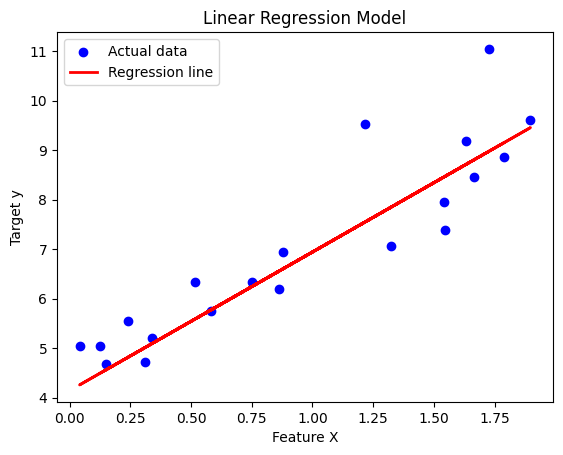

In [ ]:

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate synthetic data
np.random.seed(42)  # Set seed for reproducibility
X = 2 * np.random.rand(100, 1)  # Feature values
y = 4 + 3 * X + np.random.randn(100, 1)  # True linear relationship with noise

# Step 2: Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on test set
y_pred = model.predict(X_test)

# Step 5: Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Measures how far predictions are from actual values
r2 = r2_score(y_test, y_pred)  # Measures how well model explains variance (1 = perfect fit)

# Print model parameters and metrics
print("Model Coefficient (Slope):", model.coef_[0][0])
print("Model Intercept (Bias):", model.intercept_[0])
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Step 6: Visualization
plt.scatter(X_test, y_test, color='blue', label="Actual data")  # Scatter plot of actual data
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression line")  # Line for predictions
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Gro

In [ ]:

from sklearn.model_selection import cross_val_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Cross-validation scores:", cv_scores)
print("Average Cross-validation R²:", np.mean(cv_scores))


Mean Squared Error (MSE): 0.6536995137170021
R² Score: 0.8072059636181392
Cross-validation scores: [0.77157007 0.67807936 0.71057997 0.83003932 0.72967384]
Average Cross-validation R²: 0.7439885140164489


In this part, let's visualize Ridge regression and their effect to the regression line when noisy outliners are present in the dataset.

In Ridge regression we are fitting the following model:

$$y =  \theta_1 x + \theta_0 + \alpha\Vert \theta \Vert_2^2$$

with $\alpha$ as hyperparameter.

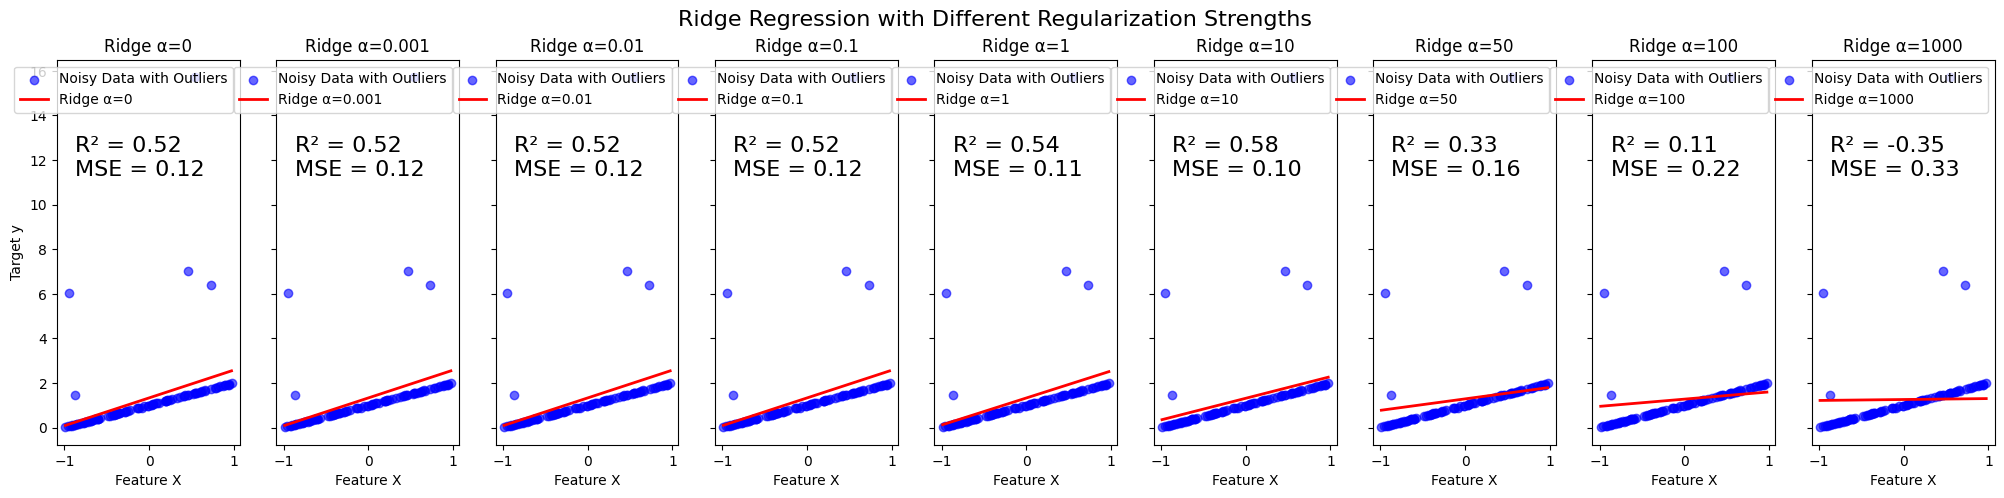

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Generate synthetic noisy data with outliers
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  # X values between -1 and 1
y = X + 1 + np.random.randn(100, 1) * 0.01  # Linear relationship with noise

# Introduce outliers
n_outliners = 5
outlier_indices = np.random.choice(100, n_outliners, replace=False)
y[outlier_indices] += np.abs(np.random.randn(n_outliners, 1) * 7)  # Large deviation

# Fit Ridge models with different alpha (regularization strength)
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
ridge_models = [Ridge(alpha=a).fit(X, y) for a in alphas]

# Sort X values for smooth plotting
X_sorted = np.sort(X, axis=0)

# Create subplots for different regularization strengths
fig, axes = plt.subplots(1, len(alphas), figsize=(25, 5), sharey=True)

for i, (alpha, model) in enumerate(zip(alphas, ridge_models)):
    y_pred_ridge = model.predict(X_sorted)


    r2 = r2_score(y[~outlier_indices], model.predict(X)[~outlier_indices])
    mse = mean_squared_error(y[~outlier_indices], model.predict(X)[~outlier_indices])
    axes[i].scatter(X, y, color="blue", label="Noisy Data with Outliers", alpha=0.6)
    axes[i].plot(X_sorted, y_pred_ridge, color="red", linewidth=2, label=f"Ridge α={alpha}")
    axes[i].set_xlabel("Feature X")
    axes[i].set_title(f"Ridge α={alpha}")
    axes[i].text(0.1, 0.7, f"R² = {r2:.2f} \nMSE = {mse:.2f}", transform=axes[i].transAxes, fontsize=16)
    axes[i].legend()

axes[0].set_ylabel("Target y")
fig.suptitle("Ridge Regression with Different Regularization Strengths", fontsize=16)
plt.show()


In the following part, we fit a regression model in the following form:

$$y = \theta_4 x^4 + \theta_3 x^3 + \theta_2 x^2 + \theta_1 x^1 + \theta_0 + \alpha\Vert \theta \Vert_2^2$$

Our model is not linear on x anymore as we introduced the polynomial terms. The model hypothesis is also stronger than the data distribution (since the data is only quadratic).

Let's see how regularization affects our model now.

Lasso:
$$y = \theta_4 x^4 + \theta_3 x^3 + \theta_2 x^2 + \theta_1 x^1 + \theta_0 + \alpha\Vert \theta \Vert$$

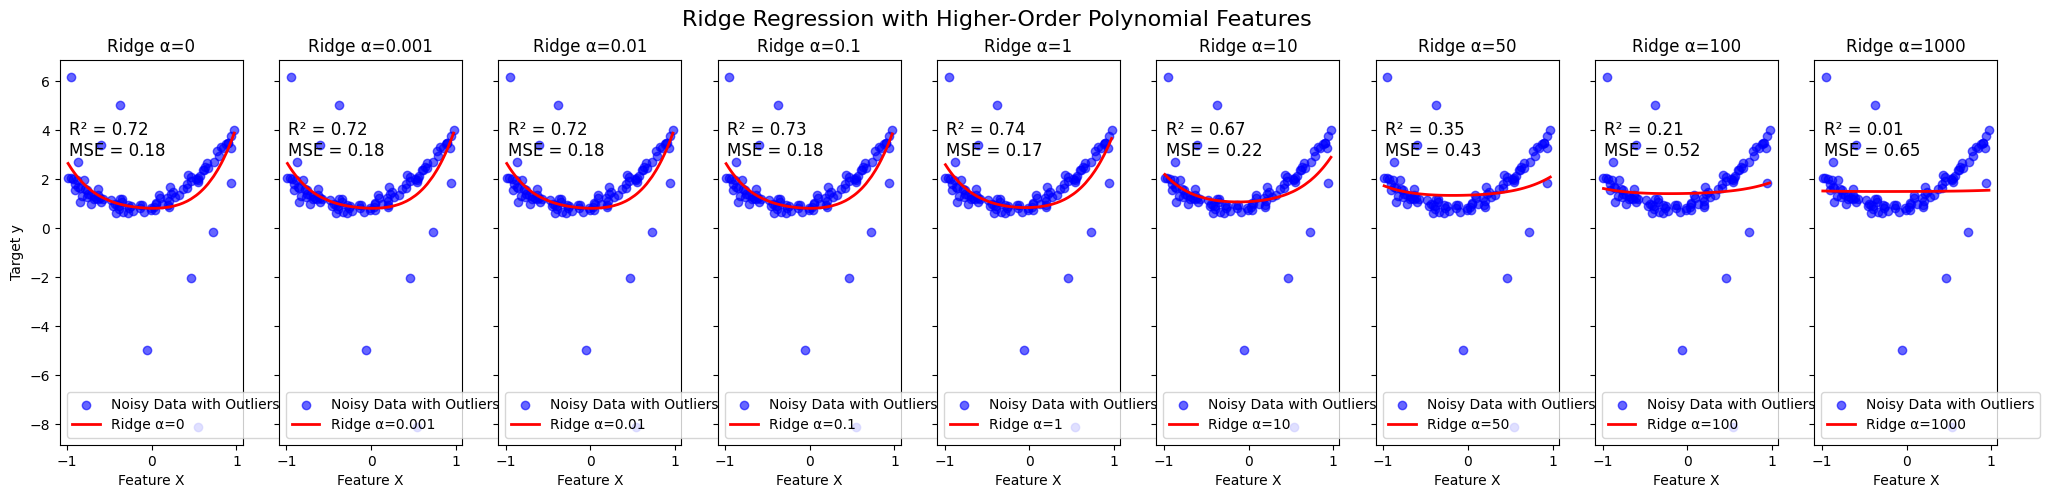

In [ ]:
# Ensure X is sorted properly before applying transformations

from sklearn.metrics import r2_score, mean_squared_error

# Generate nonlinear data
np.random.seed(42)
X_nl = 2 * np.random.rand(100, 1) - 1  # Shift range to [-1, 1]
y_nl = 2 * X_nl**2 + X_nl + 1 + np.random.randn(100, 1) * 0.2  # Quadratic with noise

# Introduce outliers
outlier_indices = np.random.choice(100, 10, replace=False)
y_nl[outlier_indices] += np.random.randn(10, 1) * 5  # Adding outliers

# Fit Ridge models with different alpha (regularization strength)
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]


X_sorted_indices = np.argsort(X_nl[:, 0])  # Sorting indices for proper plotting
X_sorted = X_nl[X_sorted_indices]

# Create polynomial features (x^4, x^3, x^2, x) using sorted X
X_poly = np.column_stack((X_nl**4, X_nl**3, X_nl**2, X_nl))
X_poly_sorted = X_poly[X_sorted_indices]

# Fit Ridge models with different alpha values
ridge_models_poly = [Ridge(alpha=a).fit(X_poly, y_nl) for a in alphas]

# Create subplots for different regularization strengths
fig, axes = plt.subplots(1, len(alphas), figsize=(25, 5), sharey=True)

for i, (alpha, model) in enumerate(zip(alphas, ridge_models_poly)):
    y_pred_ridge = model.predict(X_poly_sorted)  # Predict on sorted X for smoother curves

    # Compute performance metrics excluding outliers
    non_outlier_mask = np.ones_like(y_nl, dtype=bool).flatten()
    non_outlier_mask[outlier_indices] = False
    r2 = r2_score(y_nl[non_outlier_mask], model.predict(X_poly)[non_outlier_mask])
    mse = mean_squared_error(y_nl[non_outlier_mask], model.predict(X_poly)[non_outlier_mask])

    # Scatter plot of noisy data
    axes[i].scatter(X_nl, y_nl, color="blue", label="Noisy Data with Outliers", alpha=0.6)
    axes[i].plot(X_sorted, y_pred_ridge, color="red", linewidth=2, label=f"Ridge α={alpha}")
    axes[i].set_xlabel("Feature X")
    axes[i].set_title(f"Ridge α={alpha}")
    axes[i].text(0.05, 0.75, f"R² = {r2:.2f} \nMSE = {mse:.2f}", transform=axes[i].transAxes, fontsize=12)
    axes[i].legend()

axes[0].set_ylabel("Target y")
fig.suptitle("Ridge Regression with Higher-Order Polynomial Features", fontsize=16)
plt.show()


# 2. Logistic Regression
Logistic regression is a supervised learning classification algorithm, which means it can estimate the class of new observation based on labeled observations. In essence, logistic regression models the probability that an observation belongs to a particular category.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
        n_samples=10,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1)
print(X)
print(y)

[[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
[1 0 1 1 0 0 0 0 1 1]


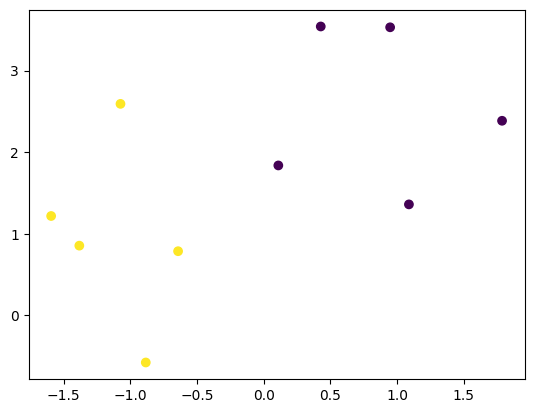

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

Score Sklearn: 1.0
[0.27561212] [[-14.70501451  -3.00497196]]


# 3. Practice: Kaggle House Price Prediction
In this part we will use our linear models for a house price prediction task from Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

In this task, we are given some features that may be relevant to house prices. Your task is to:
- Load and process the dataset;
- Build a simple linear regression model on house price prediction;
- Perform simple model evaluation and hyperparameter tuning;
- Explore what factors impact the house prices the most.



### Data Downloading and Loading.

In [ ]:
!git clone https://github.com/gvndkrishna/Kaggle-House-Price-Prediction.git

Cloning into 'Kaggle-House-Price-Prediction'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 55 (delta 4), reused 10 (delta 4), pack-reused 45 (from 1)
Receiving objects: 100% (55/55), 2.62 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
import pandas as pd
house_price_data = pd.read_csv('/content/Kaggle-House-Price-Prediction/Data/train.csv')

In [ ]:
target_label = 'SalePrice'

In [ ]:
X = house_price_data.drop(target_label, axis=1)
y = house_price_data[target_label]

In [ ]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 3.1 Simple Processing of Missing and Categorical Values.

As we can see, there are two problems with the dataset:
- missing values;
- categorical features such as MSZoning, Utilities, Street, etc.

These features aren't directly usable by a linear regression model, which assumes numerical features.

An important job of a data scientist is to understand the data and transform the data to the best form that the model can learn from. This is called feature engineering. Here, we use two simplistic approaches to deal with missing values and categorical features:

- columns containing missing values will be discarded;
- categorical features will be converted to one-hot encodings.


You are definitely encouraged to explore the best solutions on Kaggle, and see how they explore process and the data beyond applying machine learning models.

In [ ]:
X = X.drop(['Id'], axis=1)
X.dropna(axis=1, how='any', inplace=True)

KeyError: "['Id'] not found in axis"

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [ ]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# build regression model on X
X_onehot = pd.get_dummies(X)

In [ ]:
for x in X_onehot.columns:
    if X_onehot[x].dtype == 'object':
        print(x)

In [ ]:
X.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [ ]:
X_onehot.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,False,False,False,True,False,False,False,False,True,False
1,20,9600,6,8,1976,1976,978,0,284,1262,...,False,False,False,True,False,False,False,False,True,False
2,60,11250,7,5,2001,2002,486,0,434,920,...,False,False,False,True,False,False,False,False,True,False
3,70,9550,7,5,1915,1970,216,0,540,756,...,False,False,False,True,True,False,False,False,False,False
4,60,14260,8,5,2000,2000,655,0,490,1145,...,False,False,False,True,False,False,False,False,True,False


What did get_dummies do? For example, the SaleCondition feature has these unique values:

In [ ]:
X['SaleCondition'].value_counts()

,count
SaleCondition,
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [ ]:
[Normal Partial Abnorml]
[Partial, Normal, Abnorml, Normal] ->

x1 [0 1 0]
x2 [1 0 0]
x3 [0 1 0]
x4 [1 0 0]


In [ ]:
encode email - > ratio of repetitive char
email domain frequency

In X_onehot, we don't have SaleCondition anymore. Instead, it is replaced by SaleCondition_Normal, SaleCondition_Partial, and so on (more columns if more values!)

In [ ]:
for x in X_onehot.columns:
    if x.startswith('SaleCondition'):
        print(x)

SaleCondition_Abnorml
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal
SaleCondition_Partial


And, every sample with AllPub as Utilities will have Utilities_AllPub as value 1, and the other Utilities_X features as 0, etc.

*However*, it is always good to verify if you did the right thing on every data processing steps.

**Please verify in the following block that this is true.**:
- every sample with AllPub as Utilities will have Utilities_AllPub as value 1,
- every not normal salescondition has salescondition_normal as 0.

You are encourages to not use any for loop in this verification.

In [ ]:
# every normal salescondition has salescondition_normal as 1
ratio_normal_one = None
assert ratio_normal_one == 1

AssertionError: 

In [ ]:
# every not normal salescondition has salescondition_normal as 0
ratio_not_normal_zero = None
assert ratio_not_normal_zero == 1

AssertionError: 

Now, technically X_onehot is ready to use as it contains all numerical values. A lot of times, in real world problems, we need to do a lot more extensive feature engineering on the dataset for it to achieve optimal performance. Below, we show the distribution of house prices for fun.

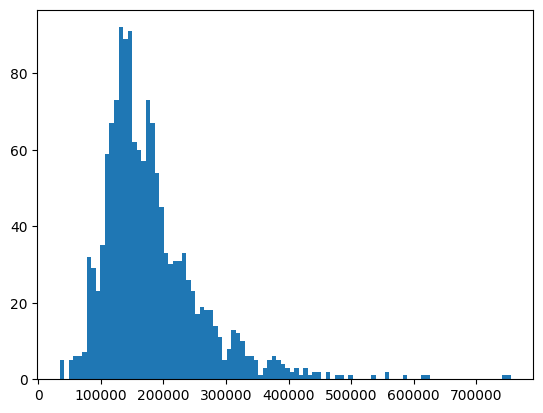

In [ ]:
plt.hist(y, 100)
plt.show()

## 3.2 Train/Test Split.

In this part, split (X_onehot, y) into train and test set, with either your own implementation or sklearn's.

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn

help(train_test_split)

### Your code here

X_train, X_test, y_train, y_test = None, None, None, None

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

## 3.3 Train a model, then evaluate on the test set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Your code here
linear_model = None
###

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 886376364.0884513
R2: 0.8844408516474941


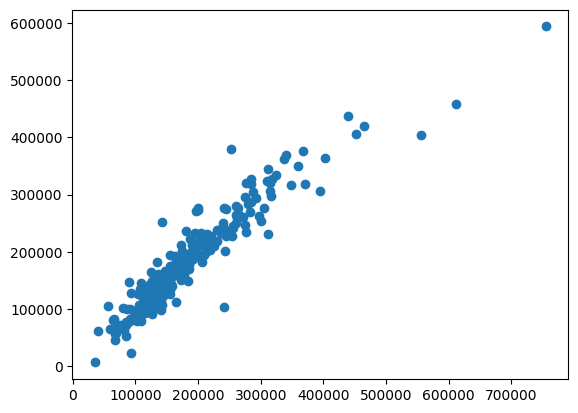

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.show()

## 3.4 Regularization test; hyperparameter selection.
Now, we will try some regularization techniques including ridge and lasso.

We will also construct a validation set for hyperparameter selection of the regularization strength.

Remember - the validation set should not be a part of test set. You should select a range of regularization strengths for Lasso and Ridge, choose the best performing model on the validation set, then report performance on test set.

Alternatively, you can perform cross-validation using sklearn.model_selection.cross_validate.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+10, tolerance: 5.453e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+09, tolerance: 5.453e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+09, tolerance: 5.453e

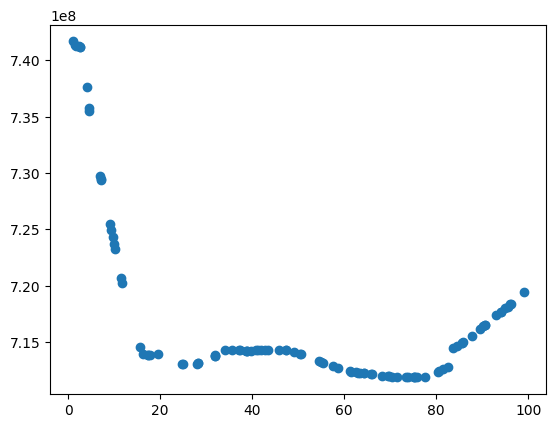

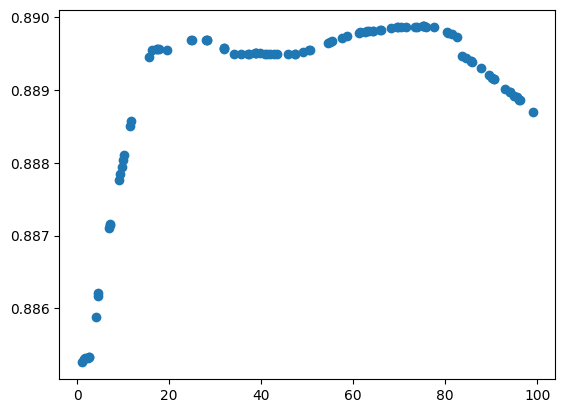

In [ ]:
#alphas = [0, 1e-7, 1e-6, 1e-5, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
alphas = np.random.uniform(0, 100, 100)
mse_per_alpha = []
r2_per_alpha = []

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# we want to standardize numerical features for regularization.

from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(X_train_train[numerical_features])
X_train_train[numerical_features] = scaler.transform(X_train_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])



for alpha in alphas:
    ### Your code here
    pass

plt.scatter(alphas, mse_per_alpha)
plt.show()

plt.scatter(alphas, r2_per_alpha)
plt.show()
###

In [ ]:

# remember to apply transform
X_train_ = X_train.copy()
X_train_[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_ = X_test.copy()
X_test_[numerical_features] = scaler.transform(X_test[numerical_features])

# select the best model, then report performance on test set

# Your code here
best_alpha = None
best_model = None
best_model.fit(X_train_, y_train)
y_pred = best_model.predict(X_test_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(840559988.1859317, 0.8904140494835378)

In [ ]:
# compare with plain model
plain_model = LinearRegression()

plain_model.fit(X_train_, y_train)
y_pred = plain_model.predict(X_test_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(886376364.0884175, 0.8844408516474984)

In [ ]:
# if you used lasso model, look at model.coef_. Do you notice the sparsity of weights?
# Which features have nonzero weights?
# What happens if you increase or decrease regularization strength?
# Compare lasso model weights and ridge model weights.

In [ ]:
model.feature_names_in_[model.coef_ > 0]

array(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'YrSold', 'MSZoning_RL', 'LotShape_IR2',
       'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'BldgType_1Fam',
       'BldgType_2fmCon', 'HouseStyle_SLvl', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'Exterior1st_MetalSd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Wd Sdng', 'ExterQual_Ex',
       'ExterCond_Fa', 'Foundation_Slab', 'HeatingQC_Ex', 'CentralAir_N',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'Funct

## 3.5 What are the most deciding factors for the house prices?

Lasso is a great way for us to find the most important features.
Can you analyze which factors most crucially contribute to house prices?

Hint: increase regularization strength on lasso and see which features are left.

## 3.6 Classification: Are house prices more expensive than 150k?

In this part we briefly try an easier classification task by converting the regression to binary classification of house prices > 150k or not.

You need to convert the label, train a simple LogisitcRegression model, then report the performance.

In [ ]:
y_train_binary = (y_train > 150000).astype(int)
y_test_binary = (y_test > 150000).astype(int)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Your code here
linear_model = None
y_pred = None
###

print(classification_report(y_test_binary, y_pred))

# 4. TF-IDF and Naive Bayes
Now we will understand text classification with TF-IDF vectorization using a Multinomial Naive Bayes Classifier


### Loading the 20 News Dataset
We are using textual data from news articles with 20 different categories. For this tutorial, we have chosen 4 categories: atheism, religion.christian, med and graphics.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd

In [ ]:
news = fetch_20newsgroups()
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Preprocessing the Data
Here, we will divide our data according to categories into training and testing samples.

In [ ]:
target_categories = ['alt.atheism','comp.graphics','sci.med','soc.religion.christian']

train = fetch_20newsgroups(subset='train', categories=target_categories, remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', categories=target_categories, remove=('headers', 'footers', 'quotes'))

### Visualizing the Data

In [ ]:
print(f'CATEGORY: {target_categories[train.target[0]]}')
print('-' * 80)
print(train.data[0])
print('-' * 80)

CATEGORY: comp.graphics
--------------------------------------------------------------------------------
Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
--------------------------------------------------------------------------------


### TF-IDF Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', token_pattern=r'\b[a-zA-Z]{2,}\b', min_df = 0.001 )

In [ ]:
sample_sentences = [
    'My name is George, this is my name',
    'I like apples',
    'apple is my favorite fruit'
    ]

sample_tfidf = tfidf_vectorizer.fit(sample_sentences)
tfidf_vectorizer.transform(sample_sentences).toarray()

array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.57735027, 0.57735027, 0.        ,
        0.        ]])

#### Quick Exercise!
Please finish the code below to vectorize the entire training and testing samples.

In [ ]:
#Finish the code below using the example from above.
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', token_pattern=r'\b[a-zA-Z]{2,}\b', min_df = 0.001 )
train_tfidf = tfidf_vectorizer.fit(train.data)
train_tfidf = tfidf_vectorizer.transform(train.data)
test_tfidf = tfidf_vectorizer.transform(test.data)

In [ ]:
assert train_tfidf.shape[1] == test_tfidf.shape[1]

### Features

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
train_dense = train_tfidf.toarray()
df_tfidf = pd.DataFrame(train_dense, columns=feature_names)
print(df_tfidf.head())

feature_names

   aaron   ab  abandon  abandoned  abdominal  aberrant  abilities  ability  \
0    0.0  0.0      0.0        0.0        0.0       0.0        0.0      0.0   
1    0.0  0.0      0.0        0.0        0.0       0.0        0.0      0.0   
2    0.0  0.0      0.0        0.0        0.0       0.0        0.0      0.0   
3    0.0  0.0      0.0        0.0        0.0       0.0        0.0      0.0   
4    0.0  0.0      0.0        0.0        0.0       0.0        0.0      0.0   

   able  abnormal  ...  yugoslavia  yuv  zaphod  zealand  zero  zillions  \
0   0.0       0.0  ...         0.0  0.0     0.0      0.0   0.0       0.0   
1   0.0       0.0  ...         0.0  0.0     0.0      0.0   0.0       0.0   
2   0.0       0.0  ...         0.0  0.0     0.0      0.0   0.0       0.0   
3   0.0       0.0  ...         0.0  0.0     0.0      0.0   0.0       0.0   
4   0.0       0.0  ...         0.0  0.0     0.0      0.0   0.0       0.0   

   zinc  zip  zoom  zooming  
0   0.0  0.0   0.0      0.0  
1   0.0  0.0  

array(['aaron', 'ab', 'abandon', ..., 'zip', 'zoom', 'zooming'],
      dtype=object)

### Classifier
We will build and train our Naive Bayes model now.

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_tfidf, train.target)

MultinomialNB()

### Prediction

In [ ]:
prediction = naive_bayes.predict(test_tfidf)
accuracy = accuracy_score(test.target, prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.788948069241012


### Custom Testing

In [ ]:
text = [
    'i do believe in jesus',
    'Nvidia released new video card',
    'an apple a day keeps the doctor away',
    'god does not exist',
    'My monitor supports HDR',
    'Vitamins are essential for your health and development'
]

check = naive_bayes.predict(tfidf_vectorizer.transform(text))

for i in range(len(check)):
    print(f'"{target_categories[check[i]]:<22}" ==> "{text[i]}"')

"soc.religion.christian" ==> "i do believe in jesus"
"comp.graphics         " ==> "Nvidia released new video card"
"sci.med               " ==> "an apple a day keeps the doctor away"
"soc.religion.christian" ==> "god does not exist"
"comp.graphics         " ==> "My monitor supports HDR"
"sci.med               " ==> "Vitamins are essential for your health and development"


# 5. Practice: Sentiment Analysis with TF-IDF and Naïve Bayes
In this section, we'll perform sentiment analysis on text data using TF-IDF vectorization, but now with a LogisticRegression classifier, similar to our first exercise.

You can implement with a plain LogisticRegression at first; Then, you can use Lasso / Ridge and tune the parameters to obtain the optimal model on validation set.

Then, compare the model performance to naive bayes.

What you need to do in the following is as follows:

- Perform TFIDF vectorization on the text data;
- As we have learned before, built a Logistic Regression model on the vectorized text data;
- Have some fun with tuning hyperparemters with Ridge and Lasso;
- Report your best model, and compare with Naive Bayes performance.

You should notice that a lot of what you will do is repetitive with the only change of the underlying model. Try to take advantage of this, or investigate sklearn.pipeline.make_pipeline.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.datasets import fetch_20newsgroups

# Use a subset of categories for simplicity
categories = ['rec.sport.hockey', 'sci.space', 'comp.graphics']
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))


In [ ]:
# labels

X_train = train_data.data
X_test = test_data.data

y_train = train_data.target
y_test = test_data.target

In [ ]:
# Continue your modeling from here.

